In [1]:
import nltk
from nltk import *
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.linear_model import LogisticRegression
import csv
import pickle
import pandas as pd
from sklearn.svm import LinearSVC
from nltk.classify.scikitlearn import SklearnClassifier # A wrapper to include the scikit learn algorithms within the nltk classifier
import matplotlib.pyplot as plt
import random

In [2]:
from sklearn.metrics import confusion_matrix 
import numpy as np
import itertools

**Tokenize the data**

In [3]:
def remove_punctuation(word):
    no_punct = ""
    for char in word:
        if char not in string.punctuation:
            no_punct = no_punct + char
    if no_punct.isnumeric():
        return ''
    return no_punct

In [4]:
''.isnumeric()

False

In [5]:
remove_punctuation(".")

''

In [6]:
ps = PorterStemmer()
def stem_the_word(word):
    word.encode('utf-8')
    return ps.stem(word)

In [7]:
stem_the_word("running")

'run'

In [8]:
def tokenize_the_training_data(data):
    tokenized_training_data = []
    for each in data:
        sentiment = each.strip().split(',')[0]
        text = str(each.strip().split(',')[1:])
        tokenized_training_data.append((word_tokenize(text), sentiment))
    return tokenized_training_data

In [9]:
stop_words = stopwords.words('english')
def filter_words(tokenized_data):
    filtered_data = []
    for (tokenized_words, sentiment) in tokenized_data:
        filtered_data.append(([stem_the_word(remove_punctuation(word.lower())) for word in tokenized_words if remove_punctuation(word.lower()) not in stop_words and remove_punctuation(word.lower()) != ''], sentiment))
    return filtered_data

In [10]:
# reading data from reviews.txt
with open("data/Reviews.txt") as file:
    data = file.readlines()
#print(data)

tokenized_training_data = tokenize_the_training_data(data)
#print(tokenized_training_data)
filtered_training_data = filter_words(tokenized_training_data)
print(filtered_training_data)


[(['nt', 'use', 'facebook', 'messeng', 'often', 'alway', 'reliabl'], '1'), (['phone', 'featur', 'nt', 'work', 'sometim', 'app', 'freez'], '0'), (['kind', 'pest', 'like', 'interrupt', 'someth', 'els'], '0'), (['envas', 'privaci', 'thing', 'comput', 'phone'], '0'), (['want', 'say', 'thank', 'help', 'heather', 'geronimo', 'wonder', 'help'], '1'), (['easi', 'use', 'like', 'notif', 'receiv', 'fb', 'messeng', 'call'], '1'), (['could', 'give', 'zero', 'star', 'forc', 'close', 'u', 'wan', 'na', 'video', 'chat'], '0'), (['great', 'app', 'littl', 'slow', 'come', 'kindl', 'fire'], '0'), (['fb', 'messeng', 'allow', 'avoid', 'work', 'keep', 'contact', 'friend'], '1'), (['like', 'fact', 'messeng', 'app', 'chat', 'fb'], '0'), (['luv', 'much', 'easier', 'text'], '1'), (['love', 'great', 'way', 'stay', 'touch'], '1'), (['fast', 'accur', 'love'], '1'), (['bosch', 'great', 'season', 'compani'], '1'), (['great', 'eaizier', 'talk', 'peopl'], '1'), (['love', 'way', 'give', 'notic'], '1'), (['think', 'improv

In [11]:
def find_words_in_data(filtered_training_data):
    all_words = []
    for (words, sentiment) in filtered_training_data:
        if words != "":
          all_words += words
    return all_words

In [12]:
len(find_words_in_data(filtered_training_data))

39216

In [13]:
def find_word_count(words):
    words = FreqDist(words)
    print(words)
    word_features = [w for (w, c) in words.most_common(1000)]
    return word_features

In [14]:
word_features = find_word_count(find_words_in_data(filtered_training_data))

<FreqDist with 3027 samples and 39216 outcomes>


In [15]:
#word_features_set = set(word_features)
word_features_set = find_words_in_data(filtered_training_data)

In [16]:
len(word_features_set)

39216

In [17]:
def find_features(each_review_words):
    global all_words_in_data
    features = {}
    words = set(each_review_words)
    for each_word in word_features_set:
        #features[each_word] = (each_word in words)
        if each_word in words:
            features[each_word] = 1
        else:
            features[each_word] = 0
    return features

In [18]:
final_filtered_data = [(find_features(words), sentiment) for (words,sentiment) in filtered_training_data]

In [19]:
final_filtered_data[0]

({'nt': 1,
  'use': 1,
  'facebook': 1,
  'messeng': 1,
  'often': 1,
  'alway': 1,
  'reliabl': 1,
  'phone': 0,
  'featur': 0,
  'work': 0,
  'sometim': 0,
  'app': 0,
  'freez': 0,
  'kind': 0,
  'pest': 0,
  'like': 0,
  'interrupt': 0,
  'someth': 0,
  'els': 0,
  'envas': 0,
  'privaci': 0,
  'thing': 0,
  'comput': 0,
  'want': 0,
  'say': 0,
  'thank': 0,
  'help': 0,
  'heather': 0,
  'geronimo': 0,
  'wonder': 0,
  'easi': 0,
  'notif': 0,
  'receiv': 0,
  'fb': 0,
  'call': 0,
  'could': 0,
  'give': 0,
  'zero': 0,
  'star': 0,
  'forc': 0,
  'close': 0,
  'u': 0,
  'wan': 0,
  'na': 0,
  'video': 0,
  'chat': 0,
  'great': 0,
  'littl': 0,
  'slow': 0,
  'come': 0,
  'kindl': 0,
  'fire': 0,
  'allow': 0,
  'avoid': 0,
  'keep': 0,
  'contact': 0,
  'friend': 0,
  'fact': 0,
  'luv': 0,
  'much': 0,
  'easier': 0,
  'text': 0,
  'love': 0,
  'way': 0,
  'stay': 0,
  'touch': 0,
  'fast': 0,
  'accur': 0,
  'bosch': 0,
  'season': 0,
  'compani': 0,
  'eaizier': 0,
  'talk'

In [20]:
len(final_filtered_data)

5313

In [21]:
print(word_features_set)

['nt', 'use', 'facebook', 'messeng', 'often', 'alway', 'reliabl', 'phone', 'featur', 'nt', 'work', 'sometim', 'app', 'freez', 'kind', 'pest', 'like', 'interrupt', 'someth', 'els', 'envas', 'privaci', 'thing', 'comput', 'phone', 'want', 'say', 'thank', 'help', 'heather', 'geronimo', 'wonder', 'help', 'easi', 'use', 'like', 'notif', 'receiv', 'fb', 'messeng', 'call', 'could', 'give', 'zero', 'star', 'forc', 'close', 'u', 'wan', 'na', 'video', 'chat', 'great', 'app', 'littl', 'slow', 'come', 'kindl', 'fire', 'fb', 'messeng', 'allow', 'avoid', 'work', 'keep', 'contact', 'friend', 'like', 'fact', 'messeng', 'app', 'chat', 'fb', 'luv', 'much', 'easier', 'text', 'love', 'great', 'way', 'stay', 'touch', 'fast', 'accur', 'love', 'bosch', 'great', 'season', 'compani', 'great', 'eaizier', 'talk', 'peopl', 'love', 'way', 'give', 'notic', 'think', 'improv', 'best', 'thing', 'sinc', 'grandma', 'sweet', 'tea', 'longer', 'sign', 'face', 'book', 'use', 'kinda', 'annoy', 'time', 'love', 'good', 'app', '

In [22]:
'''def storing_dataset(training_set):
    writer=csv.writer(open("final_dataset.csv",'w'))
    header = list(word_features_set)
    header.append("CLASS_SENTIMENT")   #  1 - for positive   and  0 - for negative
    writer.writerow(header)
    for each_row in training_set:
        listt = []
        dict = each_row[0]
        lable = each_row[1]
        for key in dict:
            listt.append(dict[key])
        listt.append(lable)
        writer.writerow(listt)
        '''

'def storing_dataset(training_set):\n    writer=csv.writer(open("final_dataset.csv",\'w\'))\n    header = list(word_features_set)\n    header.append("CLASS_SENTIMENT")   #  1 - for positive   and  0 - for negative\n    writer.writerow(header)\n    for each_row in training_set:\n        listt = []\n        dict = each_row[0]\n        lable = each_row[1]\n        for key in dict:\n            listt.append(dict[key])\n        listt.append(lable)\n        writer.writerow(listt)\n        '

In [23]:
#storing_dataset(final_filtered_data)

In [24]:
def tokenize_the_test_data(data):
    tokenized_test_data = []
    for each in data:
        sentiment = 'null'
        text = str(each.strip().split(',')[0])
        #print(text)
        tokenized_test_data.append((word_tokenize(text), sentiment))
    #print(tokenized_test_data)
    return tokenized_test_data
def predict(data, model):
    result = []
    tokenized_test_data = tokenize_the_test_data(data)
    #print(tokenized_training_data)
    filtered_test_data = filter_words(tokenized_test_data)
    #print(filtered_test_data)
    filtered_test_data = [(find_features(words), sentiment) for (words,sentiment) in filtered_test_data]
    #print(filtered_test_data)
    #print(len(filtered_test_data))
    for each in filtered_test_data:
        #print(each[0])
        result.append(model.classify(each[0]))
    return result
    
    
    

### Splitting the final filtered data into training and test Split

In [25]:
random.shuffle(final_filtered_data)
train_set = final_filtered_data[:3500]
test_set = final_filtered_data[3501:]

# Fitting a LinearSVC Classifier

In [26]:
LinearSVC_classifier = SklearnClassifier(LinearSVC())
LinearSVC_classifier.train(train_set)

<SklearnClassifier(LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
     verbose=0))>

In [27]:
print("LinearSVC_Classifier accuracy percent: ", (nltk.classify.accuracy(LinearSVC_classifier, test_set))*100)

LinearSVC_Classifier accuracy percent:  81.23620309050773


In [28]:
y_pred = []
y_actual = []
for each_set in test_set:
    y_actual.append(each_set[1])
    y_pred.append(LinearSVC_classifier.classify(each_set[0]))
print(y_pred)
print(y_actual)

['1', '1', '0', '1', '1', '1', '1', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '1', '1', '1', '1', '0', '1', '1', '1', '1', '1', '0', '1', '1', '1', '1', '0', '0', '0', '0', '1', '0', '1', '1', '0', '0', '1', '0', '0', '1', '0', '1', '1', '1', '1', '0', '0', '1', '1', '0', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '0', '0', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '1', '1', '1', '1', '1', '1', '0', '0', '1', '1', '1', '1', '1', '0', '1', '0', '1', '1', '0', '0', '0', '1', '1', '1', '1', '0', '1', '0', '1', '0', '0', '1', '1', '0', '1', '0', '0', '0', '0', '0', '1', '1', '1', '1', '1', '1', '0', '1', '1', '0', '1',

In [29]:
'''
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 8))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.savefig('./Output/Confusion_matrix.png')
plt.show()
'''

'\ndef plot_confusion_matrix(cm, classes,\n                          normalize=False,\n                          title=\'Confusion matrix\',\n                          cmap=plt.cm.Blues):\n    plt.imshow(cm, interpolation=\'nearest\', cmap=cmap)\n    plt.title(title)\n    plt.colorbar()\n    tick_marks = np.arange(len(classes))\n    plt.xticks(tick_marks, classes, rotation=45)\n    plt.yticks(tick_marks, classes)\n    print(cm)\n    thresh = cm.max() / 2.\n    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):\n        plt.text(j, i, cm[i, j],\n                 horizontalalignment="center",\n                 color="white" if cm[i, j] > thresh else "black")\n    plt.tight_layout()\n    plt.ylabel(\'True label\')\n    plt.xlabel(\'Predicted label\')\n\n# Compute confusion matrix\ncnf_matrix = confusion_matrix(y_actual, y_pred)\nnp.set_printoptions(precision=2)\n\n# Plot non-normalized confusion matrix\nplt.figure(figsize=(12, 8))\nplot_confusion_matrix(cnf_matrix, cla

In [30]:
1 += 2

SyntaxError: can't assign to literal (<ipython-input-30-57b759d079b7>, line 1)

## Predicting Sentiment Of Amazon Reviews

In [31]:
with open('./data/amazon_reviews.txt', encoding = 'utf-8') as sf:
    data = sf.readlines()
data = data[:1000]

In [32]:
def tokenize_the_reviews_data(data):
    tokenized_test_data = []
    for each in data:
        sentiment = 'null'
        text = " ".join(each.strip().split(' ')[1:])
        label = each.strip().split(' ')[:1][0].split('_')[-1:][0]
        if int(label) == 2:
            label = 1
        elif int(label) == 1:
            label = 0
        else:
            continue
            
        print([word_tokenize(text), label])
        tokenized_test_data.append((word_tokenize(text), label))
    #print(tokenized_test_data)
    return tokenized_test_data
def predict_reviews(data, model):
    result = []
    tokenized_reviews_data = tokenize_the_reviews_data(data)
    #print(tokenized_training_data)
    print(data)
    filtered_reviews_data = filter_words(tokenized_reviews_data)
    #print(filtered_test_data)
    filtered_reviews_data = [(find_features(words), sentiment) for (words,sentiment) in filtered_reviews_data]
    #print(filtered_test_data)
    #print(len(filtered_test_data))
    for each in filtered_reviews_data:
        #print(each[0])
        result.append(model.classify(each[0]))
    return result

d = tokenize_the_reviews_data(data)
reviews_df =pd.DataFrame(d, columns = ['text', 'sentiment'])

[['Great', 'CD', ':', 'My', 'lovely', 'Pat', 'has', 'one', 'of', 'the', 'GREAT', 'voices', 'of', 'her', 'generation', '.', 'I', 'have', 'listened', 'to', 'this', 'CD', 'for', 'YEARS', 'and', 'I', 'still', 'LOVE', 'IT', '.', 'When', 'I', "'m", 'in', 'a', 'good', 'mood', 'it', 'makes', 'me', 'feel', 'better', '.', 'A', 'bad', 'mood', 'just', 'evaporates', 'like', 'sugar', 'in', 'the', 'rain', '.', 'This', 'CD', 'just', 'oozes', 'LIFE', '.', 'Vocals', 'are', 'jusat', 'STUUNNING', 'and', 'lyrics', 'just', 'kill', '.', 'One', 'of', 'life', "'s", 'hidden', 'gems', '.', 'This', 'is', 'a', 'desert', 'isle', 'CD', 'in', 'my', 'book', '.', 'Why', 'she', 'never', 'made', 'it', 'big', 'is', 'just', 'beyond', 'me', '.', 'Everytime', 'I', 'play', 'this', ',', 'no', 'matter', 'black', ',', 'white', ',', 'young', ',', 'old', ',', 'male', ',', 'female', 'EVERYBODY', 'says', 'one', 'thing', '``', 'Who', 'was', 'that', 'singing', '?', "''"], 1]
[['One', 'of', 'the', 'best', 'game', 'music', 'soundtracks'

[['A', 'complete', 'Bust', ':', 'This', 'game', 'requires', 'quicktime', '5.0', 'to', 'work', '...', 'if', 'you', 'have', 'a', 'better', 'version', 'of', 'quicktime', '(', 'I', 'have', '7.5', ')', ',', 'it', 'will', 'ask', 'you', 'to', 'install', 'the', 'quicktime', 'available', 'on', 'the', 'CD', '...', 'if', 'you', 'click', 'no', ',', 'it', 'will', 'not', 'let', 'you', 'play', '.', 'So', ',', 'I', 'begrudgingly', 'clicked', 'yes', 'on', 'the', 'third', 'try', ',', 'and', 'it', 'installed', 'quicktime', '5', ',', 'THEN', 'it', 'tells', 'me', 'to', 'please', 'install', 'the', 'quicktime', 'available', 'on', 'the', 'disc', '.', 'It', 'KEPT', 'telling', 'me', 'that', ',', 'even', 'after', 'I', 'uninstalled', 'my', 'version', 'of', 'quicktime', '7.5', ',', 'and', 'reinstalled', 'Barbie', 'Rapunzel', 'and', 'quicktime', '5', '.', 'Very', 'frustrating', ',', 'and', 'the', 'game', 'absolutely', 'will', 'not', 'work', 'for', 'me', '.', 'It', 'keeps', 'telling', 'me', 'over', 'and', 'over', ',

[['The', 'Scarlet', 'Letter', 'a', 'must', 'read', 'for', 'any', 'American', ':', 'The', 'best', 'book', 'that', 'I', 'have', 'ever', 'been', 'assigned', 'to', 'read', 'for', 'school', 'by', 'far', '.', 'The', 'way', 'in', 'which', 'Hawthorne', 'captures', 'the', 'shame', 'that', 'Hetser', ',', 'the', 'wearer', 'of', 'the', 'scarlet', 'letter', ',', 'feels', 'everyday', 'and', 'the', 'utter', 'torment', 'that', 'the', 'weak', 'Dimmesdale', 'is', 'in', 'by', 'not', 'coming', 'forth', 'and', 'saying', 'he', 'slept', 'with', 'Hester', 'and', 'the', 'revenge', 'ridden', 'character', 'of', 'Chillingworth', 'is', 'spectactular.The', 'way', 'in', 'which', 'Hawthorne', 'describes', 'the', 'setting', 'and', 'the', 'actions', 'that', 'characters', 'do', 'is', 'truly', 'outstanding', '.', 'Hawthorne', 'has', 'a', 'huge', 'flare', 'for', 'the', 'dramatic', 'which', 'is', 'great', 'for', 'the', 'reader', '.', 'Since', 'Hester', 'the', 'main', 'character', 'concieved', 'her', 'daughter', 'Pearl', 't

In [33]:
reviews_df

,text,sentiment
0,"[Great, CD, :, My, lovely, Pat, has, one, of, ...",1
1,"[One, of, the, best, game, music, soundtracks,...",1
2,"[Batteries, died, within, a, year, ..., :, I, ...",0
3,"[works, fine, ,, but, Maha, Energy, is, better...",1
4,"[Great, for, the, non-audiophile, :, Reviewed,...",1
5,"[DVD, Player, crapped, out, after, one, year, ...",0
6,"[Incorrect, Disc, :, I, love, the, style, of, ...",0
7,"[DVD, menu, select, problems, :, I, can, not, ...",0
8,"[Unique, Weird, Orientalia, from, the, 1930, '...",1
9,"[Not, an, ``, ultimate, guide, '', :, Firstly,...",0


In [34]:
rs = predict_reviews(data , LinearSVC_classifier)
rs

[['Great', 'CD', ':', 'My', 'lovely', 'Pat', 'has', 'one', 'of', 'the', 'GREAT', 'voices', 'of', 'her', 'generation', '.', 'I', 'have', 'listened', 'to', 'this', 'CD', 'for', 'YEARS', 'and', 'I', 'still', 'LOVE', 'IT', '.', 'When', 'I', "'m", 'in', 'a', 'good', 'mood', 'it', 'makes', 'me', 'feel', 'better', '.', 'A', 'bad', 'mood', 'just', 'evaporates', 'like', 'sugar', 'in', 'the', 'rain', '.', 'This', 'CD', 'just', 'oozes', 'LIFE', '.', 'Vocals', 'are', 'jusat', 'STUUNNING', 'and', 'lyrics', 'just', 'kill', '.', 'One', 'of', 'life', "'s", 'hidden', 'gems', '.', 'This', 'is', 'a', 'desert', 'isle', 'CD', 'in', 'my', 'book', '.', 'Why', 'she', 'never', 'made', 'it', 'big', 'is', 'just', 'beyond', 'me', '.', 'Everytime', 'I', 'play', 'this', ',', 'no', 'matter', 'black', ',', 'white', ',', 'young', ',', 'old', ',', 'male', ',', 'female', 'EVERYBODY', 'says', 'one', 'thing', '``', 'Who', 'was', 'that', 'singing', '?', "''"], 1]
[['One', 'of', 'the', 'best', 'game', 'music', 'soundtracks'

[['one', 'of', 'the', 'last', 'in', 'the', 'series', 'to', 'collect', '!', ':', 'The', 'magazine', 'was', 'in', 'very', 'good', 'condition', 'and', 'had', 'the', 'usual', 'high', 'standard', 'of', 'articles', 'and', 'photos', 'that', 'Victoria', 'magazine', 'has', 'come', 'to', 'represent', '.', 'I', 'have', 'collected', 'all', 'the', 'previous', 'magazines', 'of', 'the', 'series', 'and', 'still', 'enjoy', 'leafing', 'through', 'them', 'on', 'a', 'rainy', 'day'], 1]
[['Sony', 'Hi8', 'Camcorder', 'with', '2.5', 'LCD', ':', 'I', 'believe', 'I', 'will', 'be', 'very', 'happy', 'with', 'the', 'camcorder', '.', 'Its', 'small', ',', 'light', 'and', 'easy', 'to', 'handle.The', 'LCD', 'is', 'clear', 'and', 'bright.Ease', 'of', 'operation', '.'], 1]
[['Do', "n't", 'Take', 'the', 'Chance', '-', 'Get', 'the', 'SE', 'Branded', 'Cable', ':', 'If', 'you', 'purchase', 'this', 'data', 'cable', ',', 'you', 'need', 'to', 'know', 'that', 'you', 'will', 'receive', 'no', 'real', 'directions', 'or', 'informa

[['Fantastic', ':', 'A', 'movie', 'that', 'makes', 'you', 'feel', 'a', 'lot', 'better', 'about', 'the', 'holidays', '.', 'Although', 'not', 'a', 'childish', 'movie', ',', 'Eight', 'Crazy', 'Nights', 'is', 'a', 'fantastic', 'Sandler', 'movie', '.'], 1]
[['very', 'disappointing', ':', 'The', 'movie', 'is', 'vulgar', 'and', 'not', 'meant', 'for', 'children', '.', 'It', 'is', 'a', 'typical', 'Adam', 'Sandler', 'movie', ',', 'with', 'foul', 'language', 'and', 'raunchy', 'humor', '.', 'Not', 'enjoyable', 'at', 'all', '.'], 0]
[['Sandler', 'Strikes', 'Out', ':', '8', 'Crazy', 'Nights', 'might', 'have', 'been', 'a', 'sweet', 'film', 'with', 'a', 'good', 'message', 'for', 'kids', ',', 'but', 'the', 'scatological', 'humor', ',', 'offensive', 'language', 'and', 'explicit', 'sexual', 'references', 'made', 'it', 'unsuitable', 'for', 'my', '10-year', 'old', '.', 'The', 'plot', ',', 'on', 'the', 'other', 'hand', ',', 'while', 'fine', 'for', '10-year', 'olds', 'was', 'too', 'obvious', 'and', 'simplist

[['Course', 'Book', ':', 'Well', 'it', 'is', 'only', 'for', 'my', 'course', 'called', 'fundamnetals', 'of', 'socal', 'research', 'but', 'its', 'very', 'expensive', 'indeed', '.', 'Just', 'wanted', 'the', 'first', 'to', 'make', 'a', 'comment', 'thats', 'all', '.'], 1]
[['Leadership', 'Made', 'Spiritual', ':', 'Maxwell', 'succeeds', 'in', 'creating', 'a', 'new', 'way', 'to', 'experience', 'leadership', 'principles', 'and', 'the', 'bible', '.', 'I', 'have', 'used', 'this', 'as', 'a', 'guide', 'for', 'my', 'youth', 'group', "'s", 'leadership', 'program', '(', 'highshcool', 'juniors', 'and', 'seniors', ')', 'and', 'it', 'has', 'been', 'perfect', '.', 'This', 'is', 'an', 'excellent', 'gift', 'idea', 'for', 'anyone', 'who', 'has', 'interest', 'in', 'leadership', 'and', 'believes', 'their', 'christain', 'faith', 'is', 'critical', 'to', 'their', 'approach', '.'], 1]
[['Absolutely', 'incredible', ':', 'I', 'was', 'so', 'happy', 'with', 'Dolly', "'s", '``', 'Hungry', 'Again', ',', "''", 'and', 'h

[['Lame', 'Jujitsuka', ':', 'I', 'find', 'that', 'the', 'moves', 'that', 'Wally', 'Jay', 'was', 'at', 'best', 'very', 'mediocre', '.', 'I', 'am', 'originally', 'from', 'Hawaii', 'and', 'have', 'had', 'many', 'Judokas', 'that', 'can', 'do', 'major', 'moves', 'that', 'when', 'watching', 'them', ',', 'the', 'moves', 'that', 'they', 'do', 'is', 'much', 'more', 'fluid', 'and', 'very', 'continuous', '.', 'To', 'see', 'that', 'many', 'martial', 'artists', 'are', 'screaming', 'their', 'credentials', 'and', 'rank', 'is', 'making', 'me', 'tired', '.', 'Though', ',', 'I', 'started', 'martial', 'arts', 'at', '3', 'years', 'old', 'and', 'became', 'a', 'head', 'instructor', 'at', '19', ',', 'I', 'have', 'more', 'skills', 'that', 'I', 'need', 'to', 'perfect', '.', 'I', 'just', 'hope', 'to', 'see', 'real', 'martial', 'artists', 'can', 'be', 'recognised', '.'], 0]
[['Small', 'type', ':', 'My', 'review', 'centers', 'on', 'only', 'one', 'thing', '-', 'the', 'type', 'size', '.', 'This', 'edition', 'is', '

[['TH', 'E', 'MOST', 'ANNOYING', 'WOMAN', 'ON', 'EARTH', ':', 'I', "'m", 'sure', 'this', 'woman', 'has', 'lots', 'of', 'valuable', 'info', 'to', 'impart', ',', 'but', 'we', 'could', 'barely', 'watch', 'this', 'DVD', '.', 'Sheri', 'Bayles', 'is', 'sooo', 'annoying', 'and', 'unfunny', 'that', 'we', 'fast', 'forwarded', 'through', 'the', 'whole', 'thing', ',', 'trying', 'to', 'cling', 'on', 'to', 'pieces', 'of', 'important', 'information', '.', 'Even', 'the', 'people', 'taking', 'the', 'class', 'seem', 'embarassed', 'for', 'her', '.', 'Avoid', 'this', 'DVD', 'unless', 'you', 'think', 'you', 'can', 'look', 'past', 'a', 'nurse', 'who', 'thinks', 'she', "'s", 'a', 'stand', 'up', 'comedian', '.', 'I', 'wish', 'I', 'had', 'another', 'to', 'suggest', '.'], 0]
[['GO', 'FOR', 'IT', '!', ':', 'This', 'tape', 'is', 'simply', 'fun', 'and', 'informative', '.', 'I', 'am', 'not', 'even', 'pregnant', 'or', 'expecting', 'to', 'have', 'to', 'conceive', 'anytime', 'soon', 'but', 'I', 'had', 'to', 'watch', 

['0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '0',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '0',
 '0',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '0',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '0',
 '1',
 '1',
 '1',
 '1',
 '1',
 '0',
 '0'

In [35]:
reviews_df['Predicted_Sentiment'] = rs 

In [36]:
len(rs)

1000

In [37]:
len(reviews_df['Predicted_Sentiment'])

1000

In [38]:
reviews_df.head()

,text,sentiment,Predicted_Sentiment
0,"[Great, CD, :, My, lovely, Pat, has, one, of, ...",1,0
1,"[One, of, the, best, game, music, soundtracks,...",1,1
2,"[Batteries, died, within, a, year, ..., :, I, ...",0,1
3,"[works, fine, ,, but, Maha, Energy, is, better...",1,0
4,"[Great, for, the, non-audiophile, :, Reviewed,...",1,1


In [39]:
n_reviews_actual  = len(reviews_df[reviews_df.sentiment == 0])
n_reviews_actual

498

In [40]:
p_reviews_actual = len(reviews_df[reviews_df.sentiment == 1])
p_reviews_actual

502

In [41]:
n_reviews_predicted  = len(reviews_df[reviews_df.Predicted_Sentiment == '0'])
n_reviews_predicted

519

In [42]:
p_reviews_predicted  = len(reviews_df[reviews_df.Predicted_Sentiment == '1'])
p_reviews_predicted

481

In [43]:
'''plt.figure(figsize=(12, 8))
plt.bar(['negative', 'positive'], [n_reviews_actual, p_reviews_actual] , width=0.2, align = 'center' , ec=['k','k'] , linewidth = 2)
plt.title('Count of Positive and Negative Tweets  (location : India)')
plt.ylabel('Frequency')
plt.xlabel('Sentiment')
plt.savefig('./Output/India_LGBT_sentiment.png')
plt.show()'''

"plt.figure(figsize=(12, 8))\nplt.bar(['negative', 'positive'], [n_reviews_actual, p_reviews_actual] , width=0.2, align = 'center' , ec=['k','k'] , linewidth = 2)\nplt.title('Count of Positive and Negative Tweets  (location : India)')\nplt.ylabel('Frequency')\nplt.xlabel('Sentiment')\nplt.savefig('./Output/India_LGBT_sentiment.png')\nplt.show()"

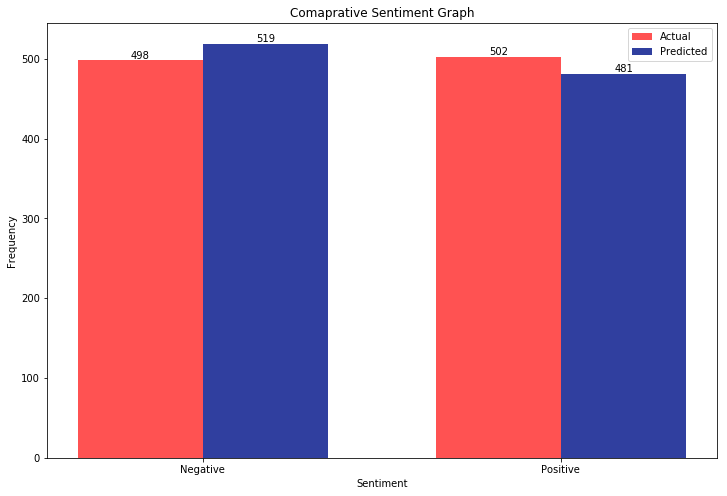

In [44]:
ind = np.arange(2)  # the x locations for the groups
width = 0.35       # the width of the bars
actual  = (n_reviews_actual, p_reviews_actual)
plt.figure(figsize = (12, 8))
fig, ax = plt.subplots(figsize = (12, 8))
rects1 = ax.bar(ind, actual, width, color='#FF5252')

predicted = (n_reviews_predicted, p_reviews_predicted)
rects2 = ax.bar(ind + width, predicted, width, color='#303F9F', linewidth=6)
ax.set_ylabel('Frequency')
ax.set_title('Comaprative Sentiment Graph')
ax.set_xticks(ind + width / 2)
ax.set_xticklabels(('Negative', 'Positive'))
ax.set_xlabel('Sentiment')

ax.legend((rects1[0], rects2[0]), ('Actual', 'Predicted'))


def autolabel(rects):
    """
    Attach a text label above each bar displaying its height
    """
    for rect in rects:
        height = rect.get_height()
        ax.text(rect.get_x() + rect.get_width()/2., 1.0*height,
                '%d' % int(height),
                ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
plt.savefig('./Output/Working_SVC_bar_graph.png')
plt.show()

In [45]:
len(reviews_df.sentiment.astype('int64').values)

1000

[[346 152]
 [173 329]]


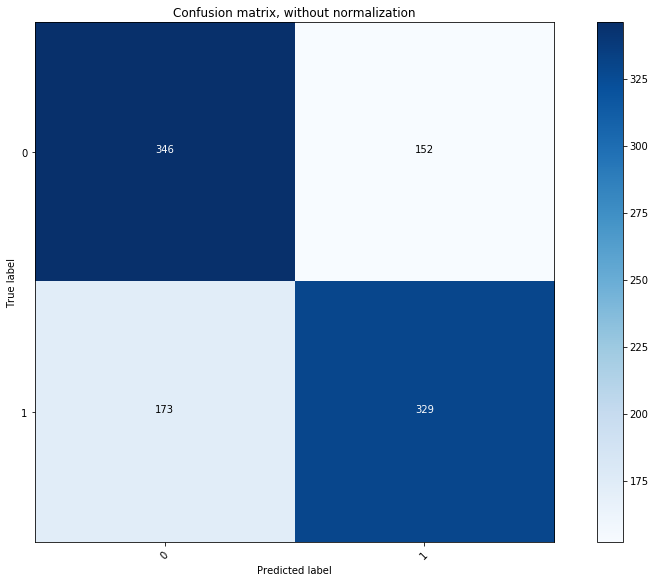

In [46]:
y_actual = list(reviews_df.sentiment.astype('int64').values)
y_pred = list(reviews_df.Predicted_Sentiment.astype('int64').values)
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    print(cm)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

# Compute confusion matrix
cnf_matrix = confusion_matrix(y_actual, y_pred)
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(12, 8))
plot_confusion_matrix(cnf_matrix, classes=[0,1],
                      title='Confusion matrix, without normalization')
plt.savefig('./Output/Linear_SVC_Confusion_matrix.png')
plt.show()